Code heavily referenced from ChatGPT, GitHub, GeekforGeeks, and StackOverflow.

# **Part 1. Visualizing Unlabeled Training Data. You are provided some unlabeled data in faces_AU.csv. Carefully select the features you wish you use, and using Principal Component Analysis, plot your data points in 2 dimensions. What is the explained variance for each component? Hint: Use sklearn's libraries and call StandardScaler before doing PCA.**


In [8]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Explained variance by component:  [0.20577816 0.12272477]


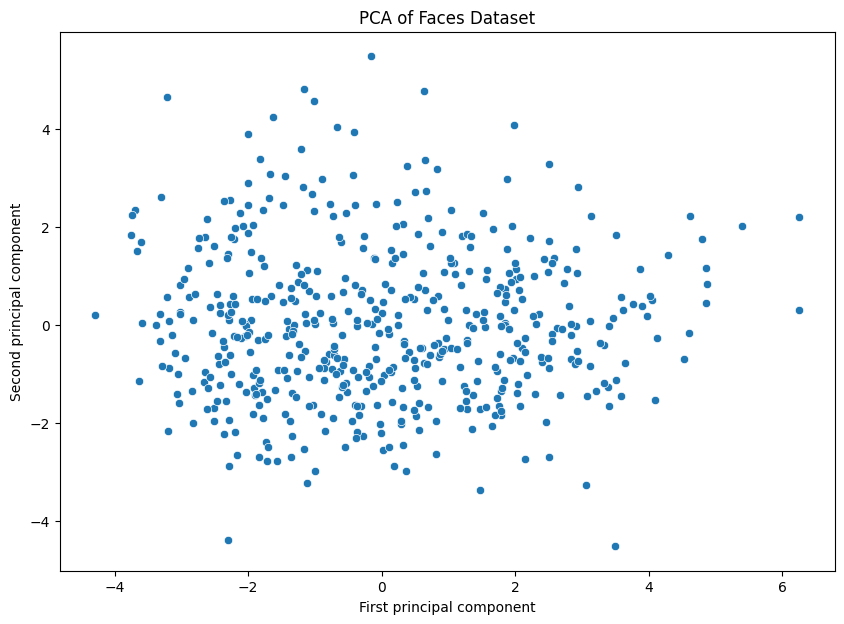

In [9]:
import pandas as pd  # https://pandas.pydata.org/
import numpy as np  # https://numpy.org/
from sklearn.preprocessing import StandardScaler  # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.decomposition import PCA  # https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
import matplotlib.pyplot as plt  # https://matplotlib.org/
import seaborn as sns  # statistical data visualization; https://seaborn.pydata.org/

data = pd.read_csv('faces/faces_AU.csv') # read data

features = [col for col in data.columns if '_r' in col]  # selects columns with '_r' in the name
# AU derived from https://www.cs.cmu.edu/~face/facs.htm
X = data[features]

scaler = StandardScaler() # use skLearn StandardScaler to scale the data
X_scaled = scaler.fit_transform(X) # fit the scaler to the data and transform the data

# PCA
pca = PCA(n_components=2)  # use PCA from skLearn to reduce the dimensionality to 2
X_pca = pca.fit_transform(X_scaled) # fit the PCA to the scaled data and transform the data

# Explained variance
print("Explained variance by component: ", pca.explained_variance_ratio_)

# Visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])
plt.title('PCA of Faces Dataset')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()


# **Part 2. K-Means and Silhouette Score. Using the PCA-reduced data (i.e, now each point is represented by 2 numbers), perform K-Means clustering and calculate a silhouette score for various values of K. Plot the scores for easier visualization. What is the optimal silhouette score that you find, and with which value of K? What does this signify? If you use scikit-learn KMeans, please set random_state = 0 to facilitate marking.**


Silhouette Score for k = 2: 0.39144034858879456
Silhouette Score for k = 3: 0.37835866981434385
Silhouette Score for k = 4: 0.34221309867556365
Silhouette Score for k = 5: 0.34067327985942264
Silhouette Score for k = 6: 0.32283833309803056
Silhouette Score for k = 7: 0.3418265194010958
Silhouette Score for k = 8: 0.3443636046069109
Silhouette Score for k = 9: 0.34377318725383127
Silhouette Score for k = 10: 0.3373678909796185


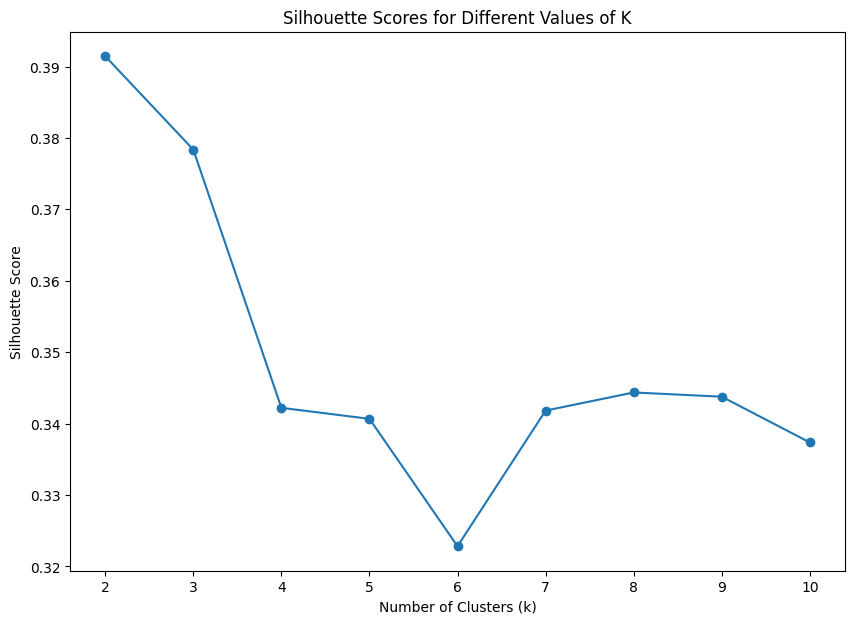

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Range of K we want to try
k_values = range(2, 11)  # Typically, we start with 2 clusters and increase

# Empty lists to store results of KMeans clustering
silhouette_scores = []

# Loop through different values of K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)  # Initialize KMeans with k clusters
    cluster_labels = kmeans.fit_predict(X_pca)  # Fit KMeans and predict cluster labels for the PCA-reduced data
    
    # Calculate silhouette score and append to list
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for k = {k}: {silhouette_avg}")

# Visualization of Silhouette Scores
plt.figure(figsize=(10, 7))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Values of K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()
